In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-591cd8e7c74d>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
exchange_rates.head()
exchange_rates.tail()
exchange_rates.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6655 entries, 0 to 6654
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6655 non-null   object 
 1   [Australian dollar ]      6655 non-null   object 
 2   [Bulgarian lev ]          6253 non-null   object 
 3   [Brazilian real ]         6387 non-null   object 
 4   [Canadian dollar ]        6655 non-null   object 
 5   [Swiss franc ]            6655 non-null   object 
 6   [Chinese yuan renminbi ]  6387 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6655 non-null   object 
 9   [Danish krone ]           6655 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6655 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6655 non-null   object 
 14  [Croatia

In [7]:
# Cleaning data
exchange_rates.rename(columns={'[Indian rupee ]': 'Indian_rupee',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

euro_to_rupee = exchange_rates[['Time', 'Indian_rupee']].copy()
euro_to_rupee.value_counts()

euro_to_rupee = euro_to_rupee[euro_to_rupee['Indian_rupee'] != '-']
euro_to_rupee['Indian_rupee'] = euro_to_rupee['Indian_rupee'].astype(float)
euro_to_rupee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6594 entries, 0 to 6654
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          6594 non-null   datetime64[ns]
 1   Indian_rupee  6326 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 154.5 KB


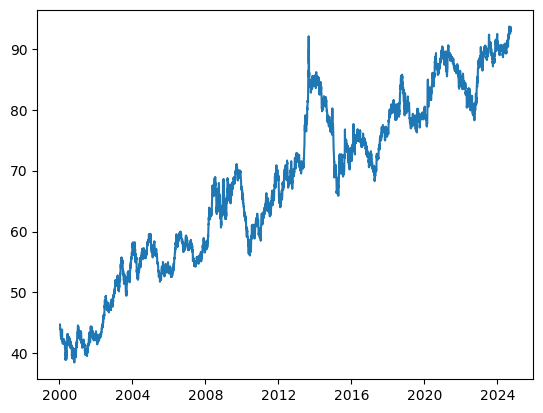

In [6]:
plt.plot(euro_to_rupee['Time'],
         euro_to_rupee['Indian_rupee'])
plt.show()

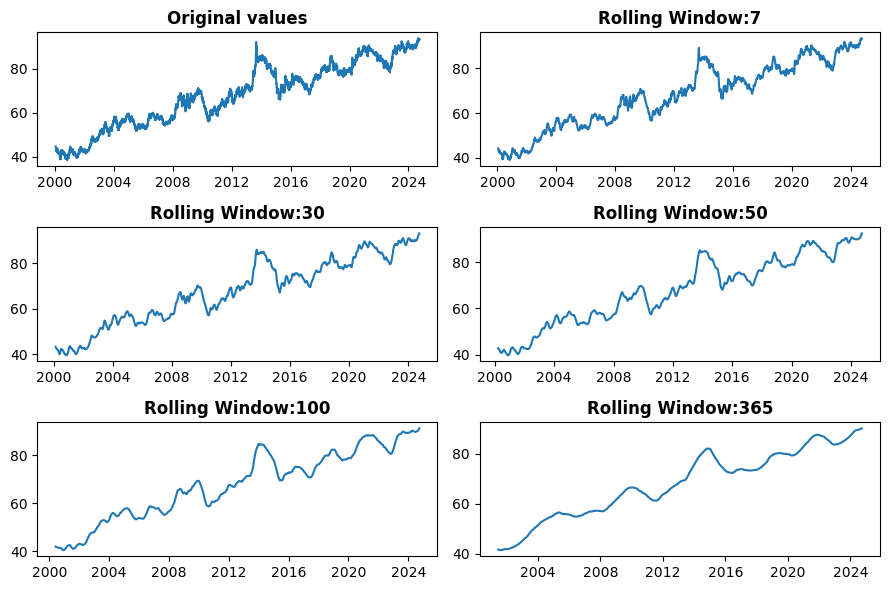

In [8]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_rupee['Time'], euro_to_rupee['Indian_rupee'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_rupee['Time'],
             euro_to_rupee['Indian_rupee'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() 
plt.show() # Auto-adjusts the padding between subplots

In [9]:
euro_to_rupee['rolling_mean'] = euro_to_rupee['Indian_rupee'].rolling(30).mean()
euro_to_rupee

,Time,Indian_rupee,rolling_mean
0,1999-01-04,NaN,NaN
1,1999-01-05,NaN,NaN
2,1999-01-06,NaN,NaN
3,1999-01-07,NaN,NaN
4,1999-01-08,NaN,NaN
...,...,...,...
6650,2024-09-23,92.8955,92.954023
6651,2024-09-24,93.1510,93.000357
6652,2024-09-25,93.5750,93.036107
6653,2024-09-26,93.2970,93.064723


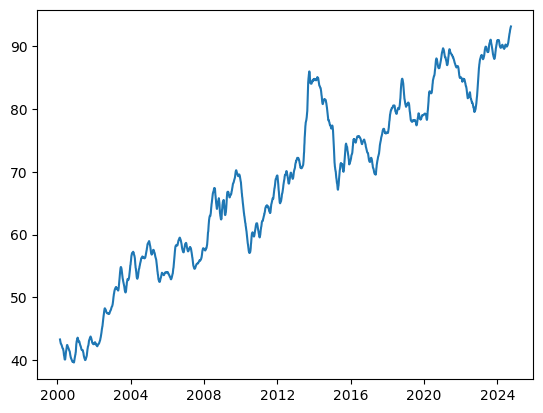

In [11]:
rupee_before_GFC=euro_to_rupee.copy()[(euro_to_rupee['Time'].dt.year>=2005) & (euro_to_rupee['Time'].dt.year<=2008)]
rupee_during_GFC = euro_to_rupee.copy()[(euro_to_rupee['Time'].dt.year>=2008)&(euro_to_rupee['Time'].dt.year<=2010)]
rupee_after_GFC=euro_to_rupee.copy()[(euro_to_rupee['Time'].dt.year>=2010)]

euro_to_rupee['rolling_mean'] = euro_to_rupee['Indian_rupee'].rolling(30).mean()

plt.plot(euro_to_rupee['Time'], euro_to_rupee['rolling_mean'])
plt.show()


import matplotlib.style as style
from datetime import datetime
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(rupee_before_GFC['Time'], rupee_before_GFC['rolling_mean'], lw=2, color='b')

ax.plot(rupee_during_GFC['Time'], rupee_during_GFC['rolling_mean'], lw=2, color='red', label= 'India GFC Period')

ax.plot(rupee_after_GFC['Time'], rupee_after_GFC['rolling_mean'], lw=2, color='b')

# print('ax:', ax.get_xticks()); to determine coordinate for text on the span
# print('ax:', ax.get_yticks()); to determine coordinatte for title
fig.set_dpi(80)
ax.grid(alpha=0.2)
ax.text((datetime(2005,1,1)), 100,' Indian Rupee Against Euro', size=18, weight='bold')
ax.text((datetime(2005,1,1)),95, 'During Global Financial Crisis (GFC) 2007-2009', size= 16)
ax.set_xlabel('Years', fontsize= 12)
ax.set_ylabel('Indian Rupee against Euro', fontsize = 12)

xmin = datetime(2007, 6, 1)  # set the left boundary of the span to June 2007
xmax = datetime(2009, 6, 1)  # set the right boundary of the span to June 2009

ax.axvspan(xmin=xmin, xmax=xmax, ymax=0.7, alpha=0.3, color='grey')

plt.show()
